# IRELAND MACHINE LEARNING

In [1]:
# importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from cmath import sqrt
import warnings
import matplotlib.pyplot as plt
import datetime
import datetime as dt
import sklearn
#import folium
import warnings
#import pydotplus
import six
import sys
import statistics as st
#import functions as fn
#import cufflinks as cf

#cf.set_config_file(offline=True)

#prof.to_file(output_file='output.html')
sys.modules['sklearn.externals.six'] = six
warnings.filterwarnings('ignore')

# import ML packages
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder#for train test splitting
from sklearn.model_selection import train_test_split#for decision tree object
from sklearn.tree import DecisionTreeClassifier#for checking testing results
from sklearn.metrics import classification_report, confusion_matrix#for visualizing tree 
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image 
from pandas.plotting import scatter_matrix
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.ensemble import RandomForestRegressor
#from explainerdashboard import RegressionExplainer, ExplainerDashboard

#for interactive analysis
from ipywidgets import interact

%matplotlib inline

# IRELAND

# IRISH Crops Dataset

# Read in df_irishmodels.csv into the df_irishdata frame for linear model

In [3]:
#Reading in Irish Crops dataset from between 2010 to 2020 8 actions 10 crop measurements and 139 crop types
df_irishdata = pd.read_csv('df_irishmodels.csv')
df_irishdata.head()

,Unnamed: 0,Year,country,crop_measurement,crops_type,crops_action,crop_value,import_export_value
0,0,2017,Ireland,ha,Apples,Area harvested,695.0,615.0
1,1,2017,Ireland,ha,Apples,Area harvested,695.0,545.0
2,2,2017,Ireland,ha,Apples,Area harvested,695.0,1985.0
3,3,2017,Ireland,ha,Apples,Area harvested,695.0,14778.0
4,4,2017,Ireland,ha,Apples,Area harvested,695.0,17923.0


# Feature Selection

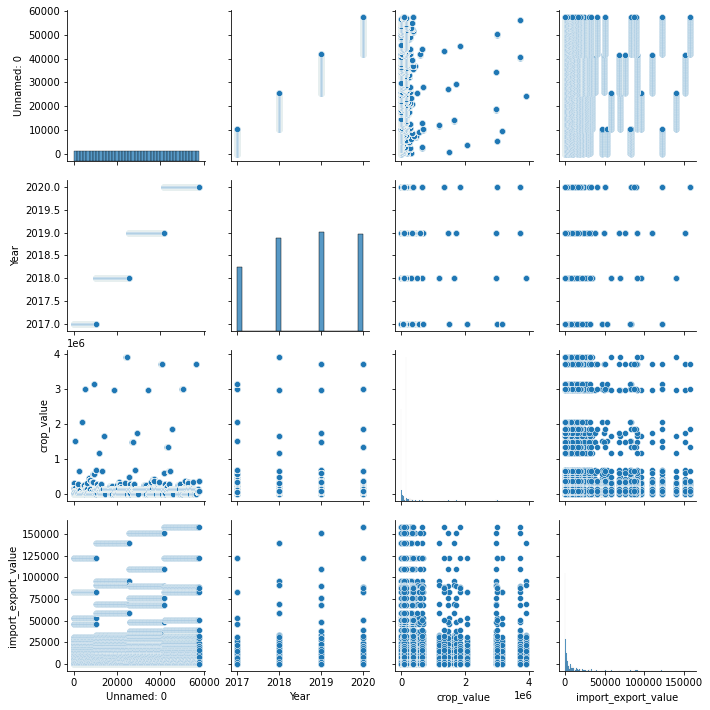

In [4]:
sns.pairplot(df_irishdata)

<AxesSubplot:>

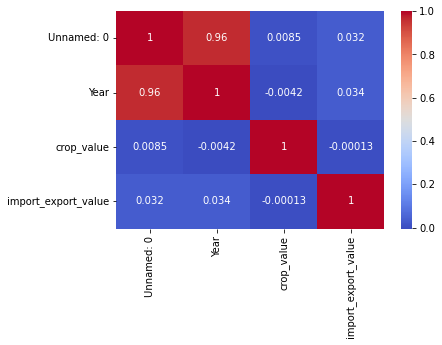

In [5]:
#Checking Correlation using heatmap
sns.heatmap(df_irishdata.corr(),annot=True,cmap='coolwarm')

 Observation:
    
-1 indicates a perfectly negative linear correlation between two variables. 0 indicates no linear correlation between two variables. 1 indicates a perfectly positive linear correlation between two variables

We can see that Year and Average Temperature have a Perfectly Positive Linear Correlation between both features. 0.85 Rain and Number of Wetdays are correlated. 0.64 Max airtemp and grass minimum temp are correlated. 0.79 grass_minimumtemp and mean/average airtemp are correlated. 0.86 grass_minimumtemp and minimum airtemp are correlated.

The target Crop_value we can see already does not have any correlation with any other feature 

# Univariate Analysis

<Figure size 864x360 with 0 Axes>

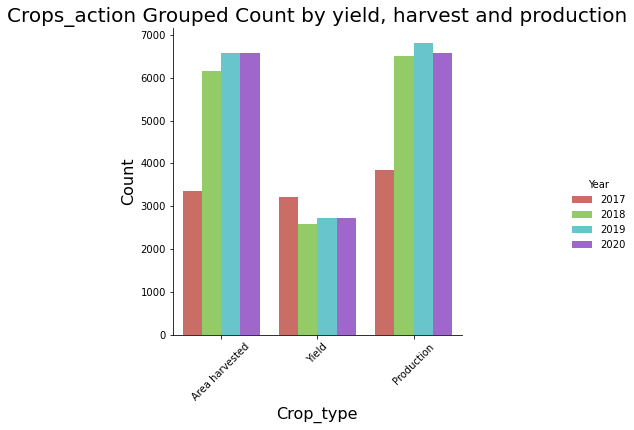

In [6]:
plt.figure(figsize=(12,5))
sns.catplot(x='crops_action', data=df_irishdata, palette="hls",kind='count',hue='Year')
plt.xlabel("Crop_type", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.title("Crops_action Grouped Count by yield, harvest and production", fontsize=20)
plt.xticks(rotation=45)
plt.show()

Observations:

1. Crop action harvest adn production were both highest in 2020

2. 2013 was the lowest year for all 3 type s harvest, yield and Production

# Bivariate Analysis

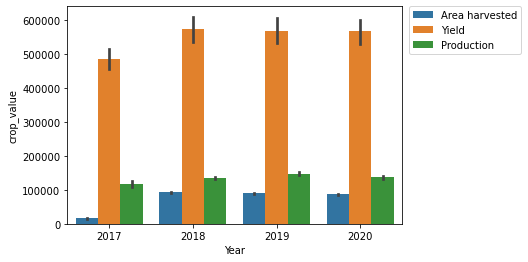

In [7]:
sns.barplot(x="Year" ,y="crop_value",hue="crops_action",data=df_irishdata)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

Observations:

Clearly observed that the crop yield for years 2018, 2019 and 2020 were best.


# Outliers Analysis

In [8]:
#Lets use the describe function 
df_irishdata.describe()

,Unnamed: 0,Year,crop_value,import_export_value
count,57660.000000,57660.000000,5.766000e+04,57660.000000
mean,28829.500000,2018.649462,1.931997e+05,9073.481408
std,16645.152598,1.067478,4.719297e+05,20373.360680
min,0.000000,2017.000000,2.000000e+00,25.000000
25%,14414.750000,2018.000000,5.890000e+03,331.000000
50%,28829.500000,2019.000000,1.492495e+05,2099.000000
75%,43244.250000,2020.000000,1.492495e+05,8378.000000
max,57659.000000,2020.000000,3.920000e+06,157805.000000


Observations:

 1.   I dont see any obvious outliers in the data above



In [9]:
df_irishdata.head()

,Unnamed: 0,Year,country,crop_measurement,crops_type,crops_action,crop_value,import_export_value
0,0,2017,Ireland,ha,Apples,Area harvested,695.0,615.0
1,1,2017,Ireland,ha,Apples,Area harvested,695.0,545.0
2,2,2017,Ireland,ha,Apples,Area harvested,695.0,1985.0
3,3,2017,Ireland,ha,Apples,Area harvested,695.0,14778.0
4,4,2017,Ireland,ha,Apples,Area harvested,695.0,17923.0


In [10]:
#Dropping ID and Source column from the data for outlier analysis
df_irishdata.drop(columns = ["Unnamed: 0","country","crop_measurement"],axis=1,inplace=True)
df_irishdata.dtypes

Year                     int64
crops_type              object
crops_action            object
crop_value             float64
import_export_value    float64
dtype: object

We have several categorical variables and will need to transform them into dummy variables with binary values in order to incorporate them into our model. This is done because despite having int values, they are not ordinal variables. In order to avoid multicollinearity we will also have to drop one of the dummy variables from each set. For example, 'month','crops_action','crops_type','country' the first variable will be dropped for our regression.

In [11]:
# create binary dummy variables from categorical variables and drop first column to avoid multicollinearity
df_irishdata = pd.get_dummies(df_irishdata, columns = ['crops_action','crops_type'],drop_first = True)


# inspect bike_data df with added dummy variables
df_irishdata.head(5)

,Year,crop_value,import_export_value,crops_action_Production,crops_action_Yield,crops_type_Apricots,crops_type_Avocados,crops_type_Bananas,crops_type_Barley,"crops_type_Beans, green",...,crops_type_Strawberries,crops_type_Sugar beet,crops_type_Sunflower seed,"crops_type_Tangerines, mandarins, clementines, satsumas",crops_type_Tomatoes,"crops_type_Vegetables, leguminous nes","crops_type_Walnuts, with shell",crops_type_Watermelons,crops_type_Wheat,"crops_type_Whey, dry"
0,2017,695.0,615.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2017,695.0,545.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2017,695.0,1985.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2017,695.0,14778.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2017,695.0,17923.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


After creating the dummy variables we want to inspect the new full list of variables.

In [12]:
# check all columns for Nans
df_irishdata.isna().any()

Year                                     False
crop_value                               False
import_export_value                      False
crops_action_Production                  False
crops_action_Yield                       False
                                         ...  
crops_type_Vegetables, leguminous nes    False
crops_type_Walnuts, with shell           False
crops_type_Watermelons                   False
crops_type_Wheat                         False
crops_type_Whey, dry                     False
Length: 67, dtype: bool

# Creating the Multiple Regression and Evaluating the Model

# To start we will create a multiple regression using all of the independant features to get a baseline.

We will be using backward selection where we start with all of the predictor variables in the model, and after evaluating the variables, remove less useful predictors one at a time or in batches for categorical variables. We will take a look at the strength of the model (adj r2) and the statistical significance (P-value) of the indepenent variables and determine how to proceed in revising the model.

Below I will be creating a multiple regression model which is a supervised machine learning parametric method. To do that I will split our data into a training set (70%) and a test set(30%) standard. I will be fiting the multiple linear regression to the features and data from the training set and then testing the performance of the model against the test set


In [13]:
# set the target variable
y = df_irishdata['crop_value']

# set the independent predictor variables
X = df_irishdata.drop('crop_value', axis=1)

# split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)# 70% training and 30% test
X_train = sm.add_constant(X_train)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)
X_train.head()

Training split input-  (40362, 67)
Testing split input-  (17298, 66)


,const,Year,import_export_value,crops_action_Production,crops_action_Yield,crops_type_Apricots,crops_type_Avocados,crops_type_Bananas,crops_type_Barley,"crops_type_Beans, green",...,crops_type_Strawberries,crops_type_Sugar beet,crops_type_Sunflower seed,"crops_type_Tangerines, mandarins, clementines, satsumas",crops_type_Tomatoes,"crops_type_Vegetables, leguminous nes","crops_type_Walnuts, with shell",crops_type_Watermelons,crops_type_Wheat,"crops_type_Whey, dry"
41844,1.0,2020,6709.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28031,1.0,2019,7042.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
739,1.0,2017,7028.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
52189,1.0,2020,3186.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28013,1.0,2019,11551.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model 1 Linear Regression using all independant variables/features

In [14]:
# fit data to linear regression
mlr1 = sm.OLS(y_train, X_train).fit()

# view OLS regression results
print(mlr1.summary())

                            OLS Regression Results                            
Dep. Variable:             crop_value   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     412.0
Date:                Tue, 27 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:04:07   Log-Likelihood:            -5.7390e+05
No. Observations:               40362   AIC:                         1.148e+06
Df Residuals:                   40295   BIC:                         1.149e+06
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

R Squared, also known as the coefficient of determination, displays the variation in the depdendent target variable y as explained by the independent predictor x variables. In other words, the percentage of the prediction outcome that can be attributed to the predictor variables of the model. Another way to look at it is R2 = explained variation / total variation. The higher the number the better the data fits the model in question.

Adjusted R Squared is used when multiple independent predictor variables exist and includes a penalty for adding additional predictors. This allows us to compare the effectiveness of different models with differing numbers of predictor variables. This is required because as I add predictors, R2 will always continue to increase, even if there is just a chance correlation between variables. In general a parsimonious model is preferred given that it meets reasonable Adjusted R Squared and statistical significance criteria.

P-Values measure the statistical significance of each variable in the model within the context of all variables in the model. It is essentially a measure of the liklihood of achieving results as extreme as were observed given a null hypothesis. In other words, the likeliness of the results being explained by random chance. A very low P-value is desired with .05 or .01 often being used as the standard depending on the context and several factors.

Model 1

Here we take a look at the strength of the model (adj r2) and the statistical significance (P-value) of the indepenent variables.

Adj R2: 0.363

There are many variables that have an unacceptably high P-value, particularly several of the categorical ones. Given that they are binary categorical dummy variables, it doesn't make much sense to keep some of them and drop only the problematic ones. For our second model we will be dropping all of variables below.

max_airtemp min_airtemp grass_minimumtemp

rain


# Model 2 - Linear Regression (Dropping all of the month columns the P values are high) backward selection

In [15]:
X_train

,const,Year,import_export_value,crops_action_Production,crops_action_Yield,crops_type_Apricots,crops_type_Avocados,crops_type_Bananas,crops_type_Barley,"crops_type_Beans, green",...,crops_type_Strawberries,crops_type_Sugar beet,crops_type_Sunflower seed,"crops_type_Tangerines, mandarins, clementines, satsumas",crops_type_Tomatoes,"crops_type_Vegetables, leguminous nes","crops_type_Walnuts, with shell",crops_type_Watermelons,crops_type_Wheat,"crops_type_Whey, dry"
41844,1.0,2020,6709.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28031,1.0,2019,7042.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
739,1.0,2017,7028.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
52189,1.0,2020,3186.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28013,1.0,2019,11551.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,1.0,2017,665.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8006,1.0,2017,9539.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17745,1.0,2018,1100.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17931,1.0,2018,8734.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
#Dropping all of the features below with a high p-value from the training model
X_train2 = X_train.drop(['crops_action_Production', 'crops_action_Yield'], axis=1)
mlr2 = sm.OLS(y_train, X_train2).fit()
print(mlr2.summary())

                            OLS Regression Results                            
Dep. Variable:             crop_value   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     231.5
Date:                Tue, 27 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:06:13   Log-Likelihood:            -5.7799e+05
No. Observations:               40362   AIC:                         1.156e+06
Df Residuals:                   40297   BIC:                         1.157e+06
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

There are still several variables that have an unacceptably high P-value, particularly the mean_airtemp average_temperature variables. We will be dropping all of the hour variables as well for our third model and observing the change.

There is no change with the Adj R2: 0.363 value.


# Model 3 - Linear Regression (Dropping all of the hour columns) backward selection

In [17]:
#Dropping all of the categorial dummie Crop values  Group features with a high p-value from the training model
X_train3 = X_train2.drop(['crops_type_Cabbages and other brassicas','crops_type_Chillies and peppers, green','crops_type_Linseed','crops_type_Onions, dry','crops_type_Strawberries','crops_type_Whey, dry'], axis=1)
mlr3 = sm.OLS(y_train, X_train2).fit()
print(mlr3.summary())

                            OLS Regression Results                            
Dep. Variable:             crop_value   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     231.5
Date:                Tue, 27 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:07:34   Log-Likelihood:            -5.7799e+05
No. Observations:               40362   AIC:                         1.156e+06
Df Residuals:                   40297   BIC:                         1.157e+06
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

Model 3

For our third model, we see that the adjusted R2 has stayed the same after dropping all hour features.

Adj. R-squared: 0.363

There are some of the actual crops with a very high P Value I will drop some of these to see does it improve our accuracy.


After looking at the results from model 3 I will keep this as our final model as all pvalues are under 0.5 infact almost at 0

# After looking at the results from model 3 I will keep this as our final model as all pvalues are under 0.5 infact almost at 0

# Variance Inflation Factors (VIF)

Variance inflation factors range from a value of 1.0 and upwards. The VIF helps us quantify the severity of multicollinearity in an OLS regression. The VIF value tells us how much larger the standard error increases compared to if that variable had 0 correlation to other independent predictor variables in your model.

In [ ]:
# create dataframe to calculate and display VIF for each variable
vif = pd.DataFrame()
vif['Features'] = X_train3.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif